In [104]:
import warnings
warnings.filterwarnings('ignore')

In [105]:
!pip install tensorflow

In [108]:

import pandas as pd
import numpy as np
import cv2
import pickle
import os
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.layers import Input, Activation, LeakyReLU, Dropout
from keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

**Preparing the Image data**

In [109]:
dataset_path = '/content/drive/My Drive/brain_tumor_dataset'

In [110]:
folders = os.listdir(dataset_path)
print(folders)

['yes', 'no']


In [112]:
subdirs = os.listdir(dataset_path)[:2]
for subdir in subdirs:
    print(f"{subdir} contains {len(os.listdir(dataset_path+'/'+subdir))} images")

yes contains 2000 images
no contains 2000 images


In [113]:
def load_images(folder):

    imgs = []
    target = 1
    labels = []
    for i in os.listdir(folder):
        subdir = os.path.join(folder, i)
        for j in os.listdir(subdir):
            img_dir = os.path.join(subdir,j)
            try:
                img = cv2.imread(img_dir)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                img = cv2.resize(img, (128,128))
                imgs.append(img)
                labels.append(target)
            except:
                continue
        target = 0

    imgs = np.array(imgs)
    labels = np.array(labels)

    return imgs, labels

In [114]:
data, labels = load_images(dataset_path)
data.shape, labels.shape

((4000, 128, 128), (4000,))

**Visualizing images**


In [ ]:
# def plot_images(start, end):
#     plt.figure(figsize=(22,8))
#     for i in range(10):
#         axs = plt.subplot(2,5, i+1)
#         idx = np.random.randint(start, end)
#         plt.imshow(data[idx], cmap='gray')
#         plt.axis('on')
#         axs.set_xticklabels([])
#         axs.set_yticklabels([])
#         plt.subplots_adjust(wspace=None, hspace=None)

In [ ]:
# plot_images(98,252)

In [ ]:
# plot_images(0,97)

**Normalization**

in Image Classification,

Xnorm = (X - Xmin) / (Xmax - Xmin) italicized text

with images, Xmin is 0 and Xmax is 255

after which, we will be using Numpy's expand_dims() to add dimension to our data.

In [115]:
norm_data = data / 255.
norm_data = np.expand_dims(norm_data, axis=3)
norm_data.shape, norm_data[0]

((4000, 128, 128, 1),
 array([[[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],
 
        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.00784314],
         [0.00784314],
         [0.00784314]],
 
        [[0.00392157],
         [0.00392157],
         [0.00784314],
         ...,
         [0.01568627],
         [0.01176471],
         [0.01176471]],
 
        ...,
 
        [[0.01176471],
         [0.01176471],
         [0.00784314],
         ...,
         [0.01568627],
         [0.01176471],
         [0.01176471]],
 
        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.01176471],
         [0.00784314],
         [0.00784314]],
 
        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.00392157],
         [0.        ],
         [0.        ]]]))

**Convolutional Neural Network**


In [130]:
SEED = 20

In [131]:
from sklearn.model_selection import train_test_split
norm_data_train, norm_data_test, labels_train, labels_test = train_test_split(norm_data, labels, test_size=0.2, random_state=SEED)

In [132]:
tf.random.set_seed(SEED)

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=64,
                           kernel_size=3,
                           activation='relu',
                           input_shape=(128,128,1)),
    tf.keras.layers.Conv2D(32,3,activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding='valid'),
    tf.keras.layers.Conv2D(32,3,activation='relu'),
    tf.keras.layers.Conv2D(16,3,activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

**compiling the model**

In [133]:
model.compile(loss = tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

**fitting the model**

In [134]:
history = model.fit(norm_data_train, labels_train, epochs = 20, validation_split = 0.20)

Epoch 1/20
80/80 [==============================] - 4s 39ms/step - loss: 0.5266 - accuracy: 0.7434 - val_loss: 0.3554 - val_accuracy: 0.8391
Epoch 2/20
80/80 [==============================] - 3s 35ms/step - loss: 0.3641 - accuracy: 0.8426 - val_loss: 0.2919 - val_accuracy: 0.8953
Epoch 3/20
80/80 [==============================] - 3s 33ms/step - loss: 0.2618 - accuracy: 0.8996 - val_loss: 0.3075 - val_accuracy: 0.8578
Epoch 4/20
80/80 [==============================] - 3s 33ms/step - loss: 0.1882 - accuracy: 0.9332 - val_loss: 0.2130 - val_accuracy: 0.9281
Epoch 5/20
80/80 [==============================] - 3s 33ms/step - loss: 0.1574 - accuracy: 0.9438 - val_loss: 0.2316 - val_accuracy: 0.9266
Epoch 6/20
80/80 [==============================] - 3s 33ms/step - loss: 0.1006 - accuracy: 0.9602 - val_loss: 0.2149 - val_accuracy: 0.9391
Epoch 7/20
80/80 [==============================] - 3s 36ms/step - loss: 0.0516 - accuracy: 0.9848 - val_loss: 0.2312 - val_accuracy: 0.9516
Epoch 8/20
80

**Evaluation**

In [135]:
train_result = model.evaluate(norm_data_train, labels_train, verbose=0)
print(f"Accuracy on Trained data: {train_result[1]*100:.2f}%\nLoss: {train_result[0]:.4f}")

Accuracy on Trained data: 99.31%
Loss: 0.0842


In [137]:
test_result = model.evaluate(norm_data_test, labels_test, verbose=0)
print(f"Accuracy on Test Data: {test_result[1]*100:.2f}%\nLoss: {test_result[0]:.4f}")

Accuracy on Test Data: 97.12%
Loss: 0.1899


In [140]:
# predict on test data
y_pred_prob = model.predict(norm_data_test)
y_pred = np.array([1 if prob>0.5 else 0 for prob in y_pred_prob])

25/25 [==============================] - 0s 10ms/step


In [141]:
y_pred

array([1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,

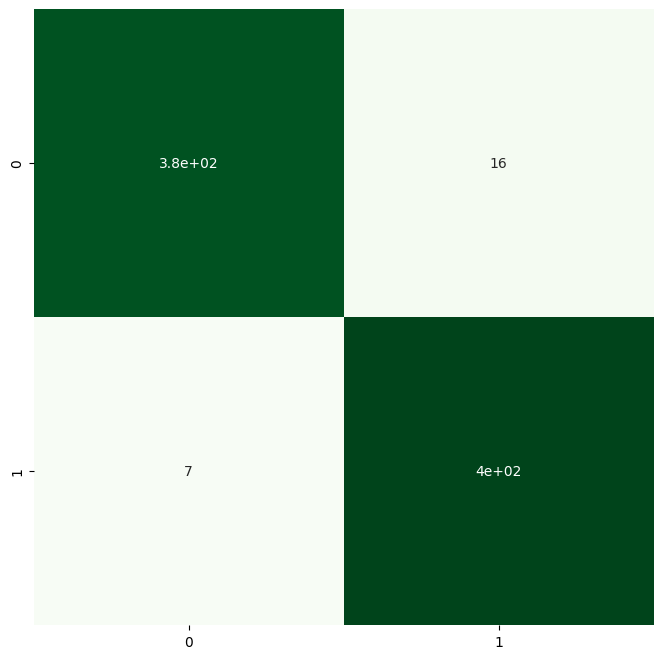

In [142]:
plt.figure(figsize = (8,8))
cm = confusion_matrix(labels_test, y_pred)
sns.heatmap(cm, cmap = "Greens", annot = True, fmt = ".2g", cbar = False)
plt.show()

In [143]:
print(classification_report(labels_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       396
           1       0.96      0.98      0.97       404

    accuracy                           0.97       800
   macro avg       0.97      0.97      0.97       800
weighted avg       0.97      0.97      0.97       800



In [145]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_40 (Conv2D)          (None, 126, 126, 64)      640       
                                                                 
 conv2d_41 (Conv2D)          (None, 124, 124, 32)      18464     
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 62, 62, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_42 (Conv2D)          (None, 60, 60, 32)        9248      
                                                                 
 conv2d_43 (Conv2D)          (None, 58, 58, 16)        4624      
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 29, 29, 16)        0         
 ng2D)                                               

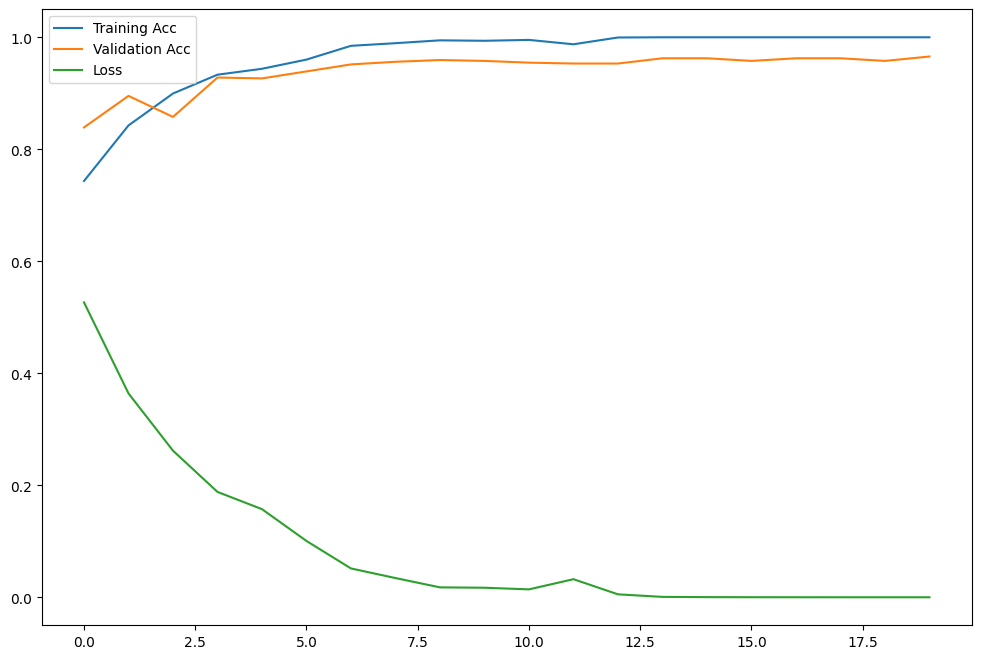

In [146]:
histdf = pd.DataFrame(history.history)

plt.figure(figsize=(12,8))
plt.plot(histdf['accuracy'], label='Training Acc')
plt.plot(histdf['val_accuracy'], label='Validation Acc')
plt.plot(histdf['loss'], label='Loss')
plt.legend()
plt.show()

In [148]:

from google.colab import files
# Save the model as an HDF5 file
model.save('brain_tumor1_CNN.h5')
# Download the saved model file
files.download('brain_tumor1_CNN.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [150]:
def preprocess_uploaded_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (128, 128))
    img = img / 255.0
    # Convolutional neural networks (CNNs) expect input data to have three dimensions: height, width, and channels
    img = np.expand_dims(img, axis=-1)  # Add a channel dimension
    return img

# So, the final output of this function is a preprocessed grayscale image with dimensions (128, 128, 1)

In [ ]:
uploaded_image_path = "/content/yes (32).jpg"
uploaded_image = preprocess_uploaded_image(uploaded_image_path)

In [ ]:
prediction = model.predict(np.array([uploaded_image]))
print(prediction)
if prediction[0][0] > 0.5:
    print("Brain tumor is present.")
else:
    print("No brain tumor detected.")

1/1 [==============================] - 0s 18ms/step
[[4.723757e-23]]
No brain tumor detected.
